In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import json

drwtNo1 = []
drwtNo2 = []
drwtNo3 = []
drwtNo4 = []
drwtNo5 = []
drwtNo6 = []
bnusNo = []
totSellamnt = []
drwNoDate = []
firstAccumamnt = []
firstPrzwnerCo = []
firstWinamnt = []

for i in tqdm(range(1, 1072)):
    req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i)
    
    req_lotto = requests.get(req_url)
    
    lottoNo = req_lotto.json()
    
    drwtNo1.append(lottoNo['drwtNo1'])
    drwtNo2.append(lottoNo['drwtNo2'])
    drwtNo3.append(lottoNo['drwtNo3'])
    drwtNo4.append(lottoNo['drwtNo4'])
    drwtNo5.append(lottoNo['drwtNo5'])
    drwtNo6.append(lottoNo['drwtNo6'])
    bnusNo.append(lottoNo['bnusNo'])
    totSellamnt.append(lottoNo['totSellamnt'])
    drwNoDate.append(lottoNo['drwNoDate'])
    firstAccumamnt.append(lottoNo['firstAccumamnt'])
    firstPrzwnerCo.append(lottoNo['firstPrzwnerCo'])
    firstWinamnt.append(lottoNo['firstWinamnt'])
    
    lotto_dict = {"추첨일":drwNoDate, "Num1":drwtNo1, "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, "Num5":drwtNo5, "Num6":drwtNo6,
                    "bnsNum":bnusNo, "총판매금액":totSellamnt, "총1등당첨금":firstAccumamnt, "1등당첨인원":firstPrzwnerCo, 
                    "1등수령액":firstWinamnt}
    
df_lotto = pd.DataFrame(lotto_dict)
df_lotto

100%|██████████| 1071/1071 [07:20<00:00,  2.43it/s]


,추첨일,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,16,24,29,40,41,42,3,6277102000,3041094900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2023-05-13,7,10,19,23,28,33,18,110703299000,25754482130,13,1981114010
1067,2023-05-20,4,7,19,26,33,35,3,108988932000,25914660766,19,1363929514
1068,2023-05-27,1,10,18,22,28,31,44,108388892000,26085045756,14,1863217554
1069,2023-06-03,3,6,14,22,30,41,36,107222802000,26027637006,14,1859116929


In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df = pd.read_csv('lotto.csv')
df.head()

,추첨일,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,16,24,29,40,41,42,3,6277102000,3041094900,0,0


In [3]:
df_num = df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'bnsNum']]
df_num.head()

,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3


In [4]:
df_num = df_num.rename(columns={'bnsNum': 'Num7'})
df_num.head()

,Num1,Num2,Num3,Num4,Num5,Num6,Num7
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3


In [17]:
final_numbers = []
for _ in range(20):
    numbers = []
    for i in range(1, 8):
        num = df_num[f'Num{i}'].value_counts().to_dict()
        for j in numbers:
            if j in num:
                del num[j]
        frequencies = list(num.values())
        weights = [freq / sum(frequencies) * 100 for freq in frequencies]
        number = random.choices(list(num.keys()), weights=weights, k=1)

        numbers.append(number[0])

    final_numbers.append(numbers)

target_std_dev = 15
tolerance = 1

filtered_list = []

for sublist in final_numbers:
    sublist_values = sublist[:-1]
    std_dev = np.std(sublist_values)
    
    if abs(std_dev - target_std_dev) <= tolerance:
        filtered_list.append(sublist)

filtered_list

[[8, 5, 10, 29, 33, 44, 3],
 [4, 10, 29, 6, 37, 41, 9],
 [1, 8, 23, 31, 39, 43, 17],
 [5, 6, 34, 32, 36, 44, 13],
 [2, 9, 34, 28, 21, 45, 19]]

In [7]:
filtered_lists = []
for lst in final_numbers:
    std_dev = np.std(lst)
    filtered_lists.append(std_dev)
filtered_lists[:5]

[9.529760045804524,
 10.329272847157268,
 15.936096877010675,
 13.705354234527379,
 10.356896548795348]

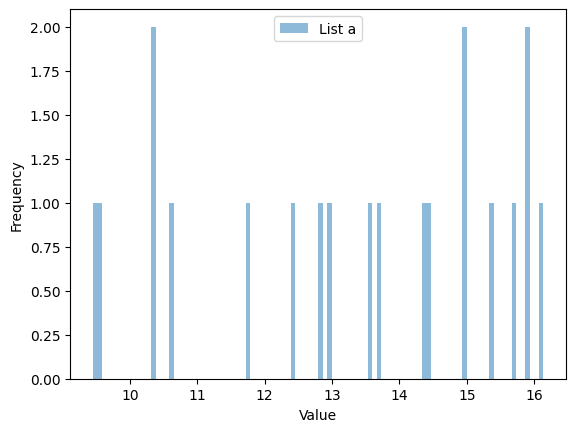

In [15]:
import matplotlib.pyplot as plt

plt.hist(filtered_lists, bins=100, alpha=0.5, label='List a')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend();